## stock price prediction using ML in Aramco market
![Stock Price Prediction](https://the-cradle-media.s3.eu-west-1.amazonaws.com/wp-content/uploads/2023/05/download-19.jpg)
Stock price prediction is a pivotal area of study within the fields of finance and investment. The ability to accurately forecast future stock prices can significantly enhance investment strategies and risk management. This process leverages advanced analytical techniques, including historical data analysis, machine learning algorithms, and statistical modeling.

In practice, stock price predictions utilize a diverse array of data points, such as opening and closing prices, daily highs and lows, trading volumes, and various financial indicators. Additionally, external factors like economic indicators, market sentiment, and corporate earnings reports play a crucial role in influencing stock prices.

This project focuses on analyzing the financial data of Aramco, employing sophisticated predictive models to generate insights into potential price movements. By integrating various analytical methodologies, this study aims to equip investors with the necessary tools to make informed decisions in an increasingly complex and dynamic market landscape.

Ultimately, effective stock price prediction not only fosters better investment outcomes but also contributes to a deeper understanding of market dynamics, thereby enhancing overall investment acumen.

# Tasks for Stock Price Prediction Project

### 1. Data Collection

### 2. Data Preprocessing

### 3. Exploratory Data Analysis (EDA)

### 4. Feature Engineering

### 5. Model Selection

### 6. Model Training

### 7. Model Evaluation

### 8. Predictions


### Data Cleaning & Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv("aramco.csv")
df.head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close_diff,Lag_Close,...,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Change_Close,Change_Volume,Weekday,Month,Year,Quarter,Volume_Normalized
0,2019-12-11 00:00:00+03:00,25.485229,25.485229,25.485229,25.485229,38289394,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2,12,2019,4,1.580604
1,2019-12-12 00:00:00+03:00,28.019275,28.019275,26.064442,26.643652,505692621,0.0,0.0,1.158422,25.485229,...,NaN,NaN,NaN,1.158422,467403227.0,3,12,2019,4,27.146985
2,2019-12-15 00:00:00+03:00,26.860858,27.150462,26.643654,27.078060,98349281,0.0,0.0,0.434408,26.643652,...,NaN,NaN,NaN,0.434408,-407343340.0,6,12,2019,4,4.865806
3,2019-12-16 00:00:00+03:00,27.150464,27.584871,27.150464,27.512470,105973907,0.0,0.0,0.434410,27.078060,...,NaN,NaN,NaN,0.434410,7624626.0,0,12,2019,4,5.282864
4,2019-12-17 00:00:00+03:00,27.548665,27.621067,27.150460,27.331463,142672245,0.0,0.0,-0.181007,27.512470,...,NaN,NaN,NaN,-0.181007,36698338.0,1,12,2019,4,7.290218
5,2019-12-18 00:00:00+03:00,27.150463,27.222865,26.571253,26.571253,83822621,0.0,0.0,-0.760210,27.331463,...,NaN,NaN,NaN,-0.760210,-58849624.0,2,12,2019,4,4.071216
6,2019-12-19 00:00:00+03:00,26.571249,26.607450,25.702435,25.702435,108120197,0.0,0.0,-0.868818,26.571253,...,NaN,NaN,NaN,-0.868818,24297576.0,3,12,2019,4,5.400263
7,2019-12-22 00:00:00+03:00,25.774840,25.847241,25.268032,25.557636,39709972,0.0,0.0,-0.144798,25.702435,...,NaN,NaN,NaN,-0.144798,-68410225.0,6,12,2019,4,1.658308
8,2019-12-23 00:00:00+03:00,25.557632,25.811035,25.521431,25.774836,35098090,0.0,0.0,0.217199,25.557636,...,NaN,NaN,NaN,0.217199,-4611882.0,0,12,2019,4,1.406044
9,2019-12-24 00:00:00+03:00,25.811039,25.847240,25.557635,25.630037,22184338,0.0,0.0,-0.144798,25.774836,...,NaN,NaN,NaN,-0.144798,-12913752.0,1,12,2019,4,0.699677


In [3]:
df.shape

(1095, 28)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1095 non-null   object 
 1   Open               1095 non-null   float64
 2   High               1095 non-null   float64
 3   Low                1095 non-null   float64
 4   Close              1095 non-null   float64
 5   Volume             1095 non-null   int64  
 6   Dividends          1095 non-null   float64
 7   Stock Splits       1095 non-null   float64
 8   Close_diff         1094 non-null   float64
 9   Lag_Close          1094 non-null   float64
 10  Lag_High           1094 non-null   float64
 11  Lag_Low            1094 non-null   float64
 12  Rolling_Mean_7     1089 non-null   float64
 13  Rolling_Std_7      1089 non-null   float64
 14  Rolling_Mean_30    1066 non-null   float64
 15  Rolling_Std_30     1066 non-null   float64
 16  RSI                1082 

### Date Validation

In [5]:
# Ensure 'Date' column is valid and convert to datetime
try:
    pd.to_datetime(df['Date'])
    print("All dates are valid.")
except ValueError:
    print("Invalid dates found.")

df['Date'] = pd.to_datetime(df['Date'])

All dates are valid.


### Missing Values

In [6]:
df.isna().any()

Date                 False
Open                 False
High                 False
Low                  False
Close                False
Volume               False
Dividends            False
Stock Splits         False
Close_diff            True
Lag_Close             True
Lag_High              True
Lag_Low               True
Rolling_Mean_7        True
Rolling_Std_7         True
Rolling_Mean_30       True
Rolling_Std_30        True
RSI                   True
MACD                 False
BB_Middle_Band        True
BB_Upper_Band         True
BB_Lower_Band         True
Change_Close          True
Change_Volume         True
Weekday              False
Month                False
Year                 False
Quarter              False
Volume_Normalized    False
dtype: bool

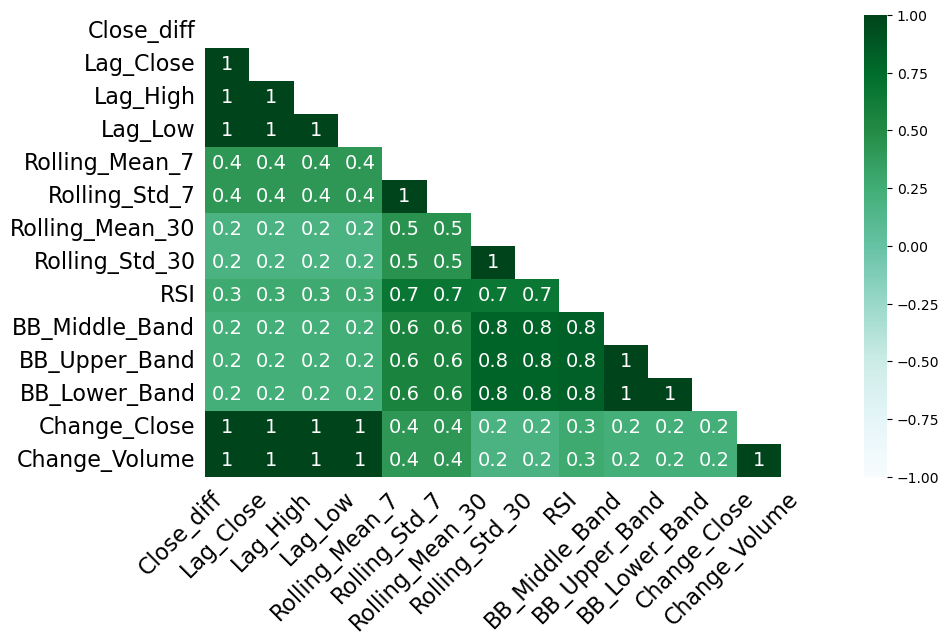

In [7]:
df.isna().sum()
msno.heatmap(df, cmap="BuGn", figsize=(10, 6))
plt.show()

In [8]:
def fill_nan_with_mean(df):
    df = df.copy()
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:  # Check if the column is numeric
            mean_value = df[col].mean()
            df[col].fillna(mean_value, inplace=True)
        else:
            print(f"Column '{col}' is not numeric and will be skipped.")
    return df


In [9]:
df = fill_nan_with_mean(df.copy())
df.head()

Column 'Date' is not numeric and will be skipped.


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close_diff,Lag_Close,...,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Change_Close,Change_Volume,Weekday,Month,Year,Quarter,Volume_Normalized
0,2019-12-11 00:00:00+03:00,25.485229,25.485229,25.485229,25.485229,38289394,0.0,0.0,0.004081,28.862653,...,28.876488,29.845713,27.907262,0.004081,-2.627509e+04,2,12,2019,4,1.580604
1,2019-12-12 00:00:00+03:00,28.019275,28.019275,26.064442,26.643652,505692621,0.0,0.0,1.158422,25.485229,...,28.876488,29.845713,27.907262,1.158422,4.674032e+08,3,12,2019,4,27.146985
2,2019-12-15 00:00:00+03:00,26.860858,27.150462,26.643654,27.078060,98349281,0.0,0.0,0.434408,26.643652,...,28.876488,29.845713,27.907262,0.434408,-4.073433e+08,6,12,2019,4,4.865806
3,2019-12-16 00:00:00+03:00,27.150464,27.584871,27.150464,27.512470,105973907,0.0,0.0,0.434410,27.078060,...,28.876488,29.845713,27.907262,0.434410,7.624626e+06,0,12,2019,4,5.282864
4,2019-12-17 00:00:00+03:00,27.548665,27.621067,27.150460,27.331463,142672245,0.0,0.0,-0.181007,27.512470,...,28.876488,29.845713,27.907262,-0.181007,3.669834e+07,1,12,2019,4,7.290218


In [10]:
df.isna().sum()

Date                 0
Open                 0
High                 0
Low                  0
Close                0
Volume               0
Dividends            0
Stock Splits         0
Close_diff           0
Lag_Close            0
Lag_High             0
Lag_Low              0
Rolling_Mean_7       0
Rolling_Std_7        0
Rolling_Mean_30      0
Rolling_Std_30       0
RSI                  0
MACD                 0
BB_Middle_Band       0
BB_Upper_Band        0
BB_Lower_Band        0
Change_Close         0
Change_Volume        0
Weekday              0
Month                0
Year                 0
Quarter              0
Volume_Normalized    0
dtype: int64

### Data visualization

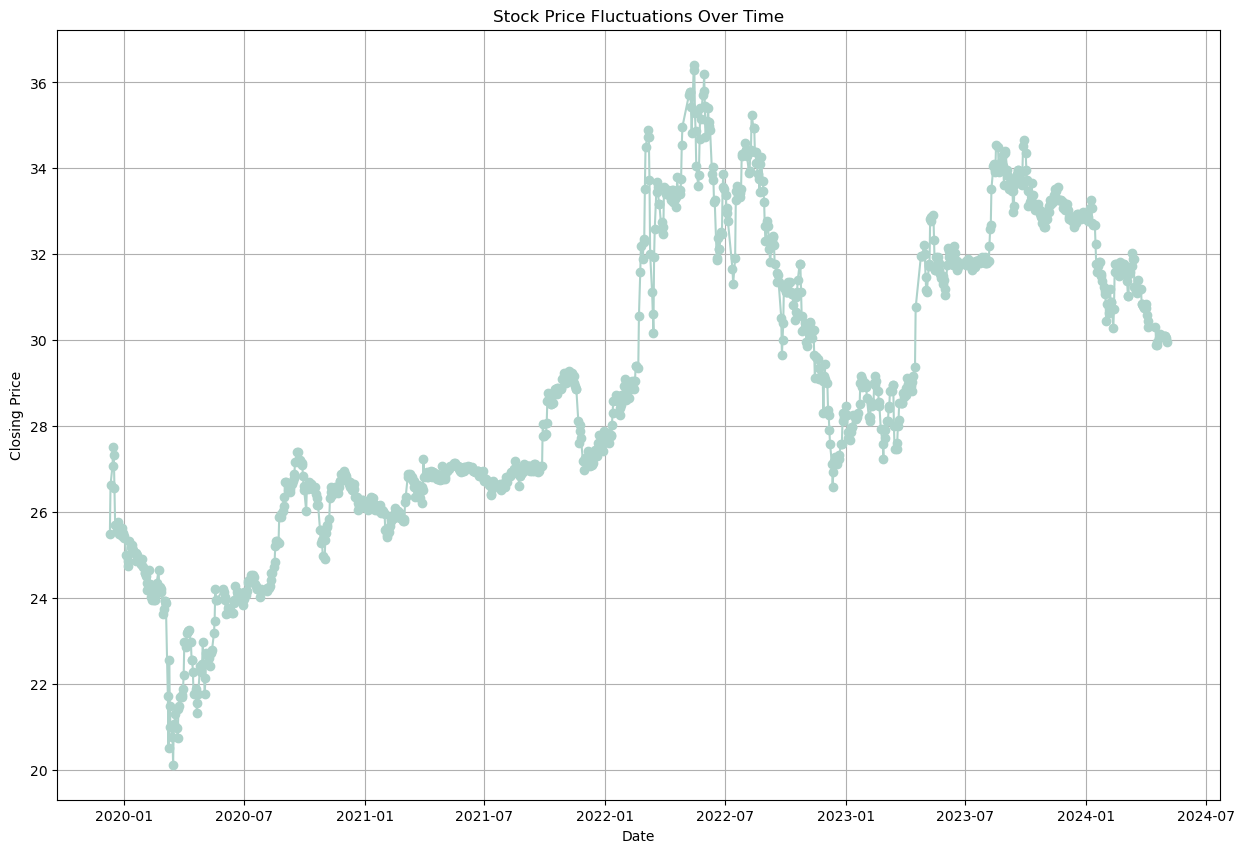

In [17]:
# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Plot stock closing prices over time
plt.figure(figsize=(15, 10))
plt.plot(df['Date'], df['Close'], marker='o', color='#ADD2CA', linestyle='-')
plt.title('Stock Price Fluctuations Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)  # Added grid for better readability
plt.show()

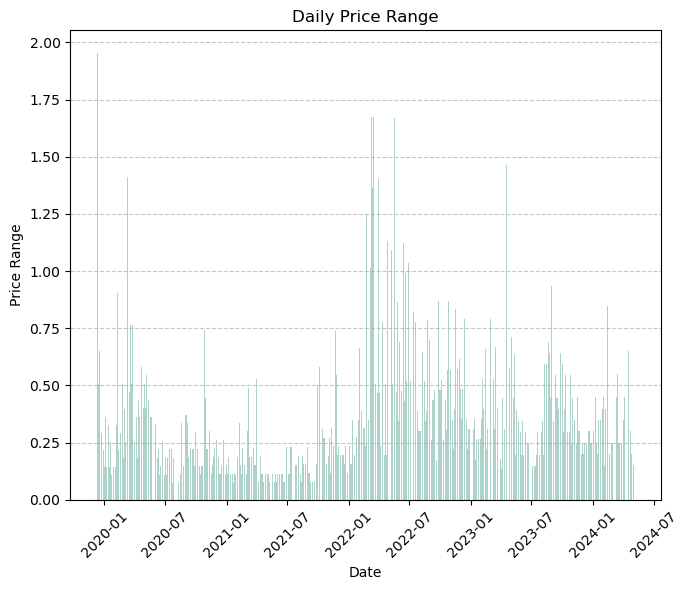

In [22]:
# Plot daily price range
plt.figure(figsize=(7, 6))
plt.bar(df['Date'], df['High'] - df['Low'], color='#ADD2CA', width=1.0)  # Adjusted width for better visibility
plt.title('Daily Price Range')
plt.xlabel('Date')
plt.ylabel('Price Range')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Added grid lines for better visualization
plt.show()

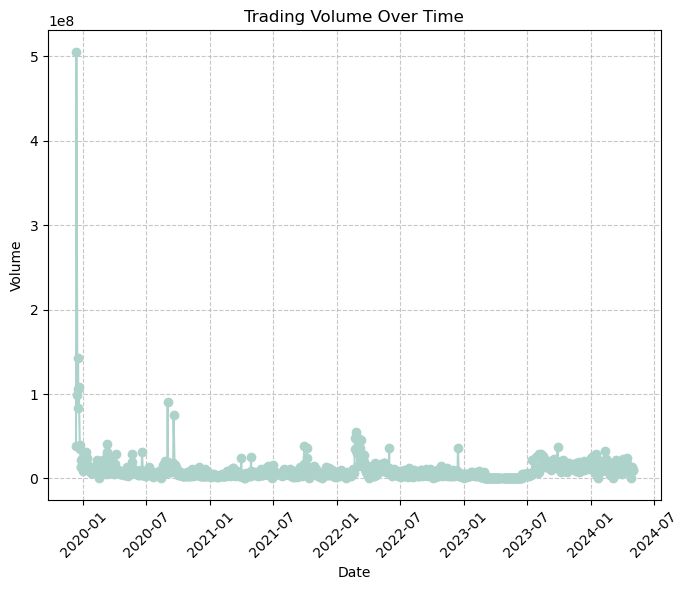

In [23]:
# Plot volume traded over time
plt.figure(figsize=(7, 6))
plt.plot(df['Date'], df['Volume'], marker='o', color='#ADD2CA', linestyle='-', markersize=6)  # Adjusted marker style and size
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.grid(True, linestyle='--', alpha=0.7)  # Added grid lines for better visualization
plt.show()

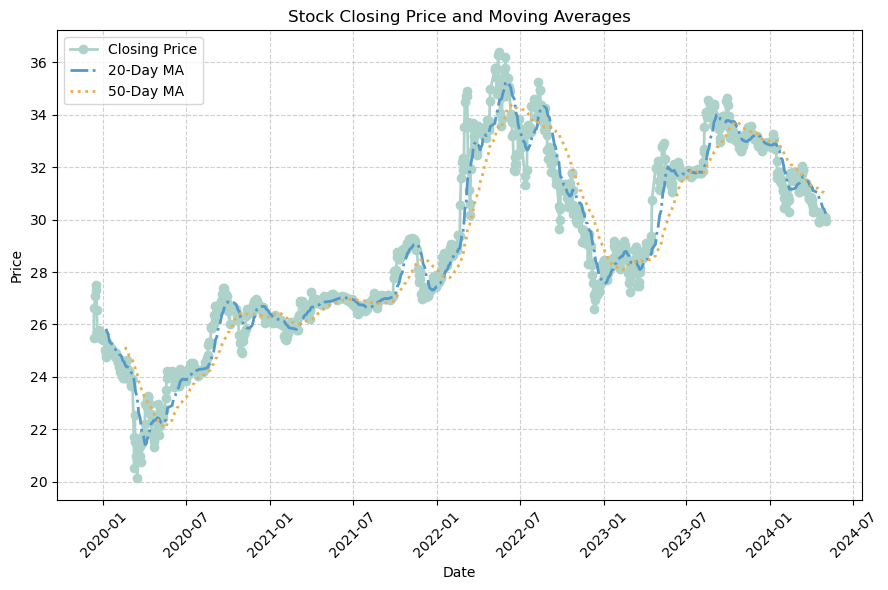

In [26]:
# Plot closing prices and moving averages
plt.figure(figsize=(9, 6))
plt.plot(df['Date'], df['Close'], color='#ADD2CA', linewidth=2, marker='o', markersize=6, label='Closing Price')
plt.plot(df['Date'], df['Close'].rolling(window=20).mean(), color='#5599C8', linewidth=2, linestyle='-.', label='20-Day MA')
plt.plot(df['Date'], df['Close'].rolling(window=50).mean(), color='#EDAD4A', linewidth=2, linestyle=':', label='50-Day MA')
plt.title('Stock Closing Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

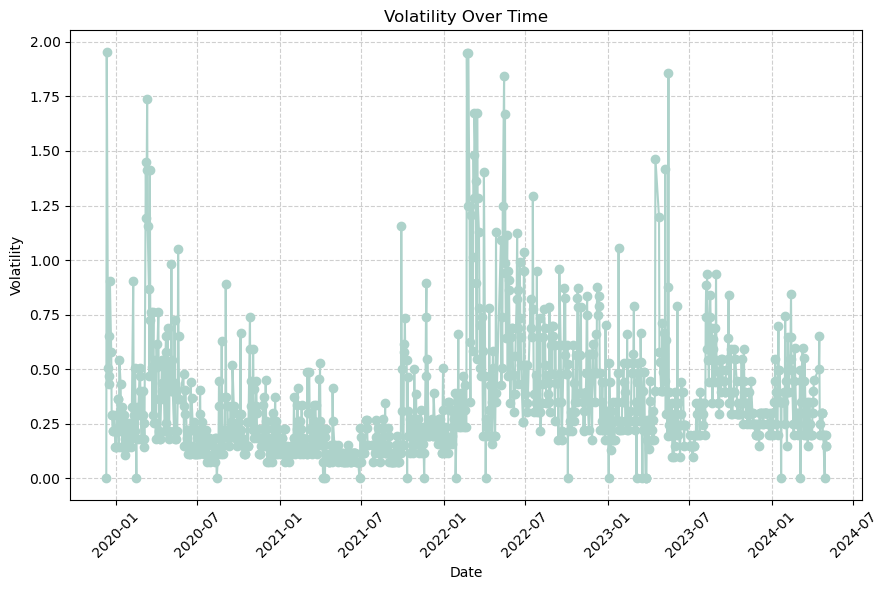

In [28]:
# Plot volatility (difference between high and low prices) over time
plt.figure(figsize=(9, 6))
plt.plot(df['Date'], df['High'] - df['Low'], color='#ADD2CA', marker='o', linestyle='-', linewidth=1.5)
plt.title('Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

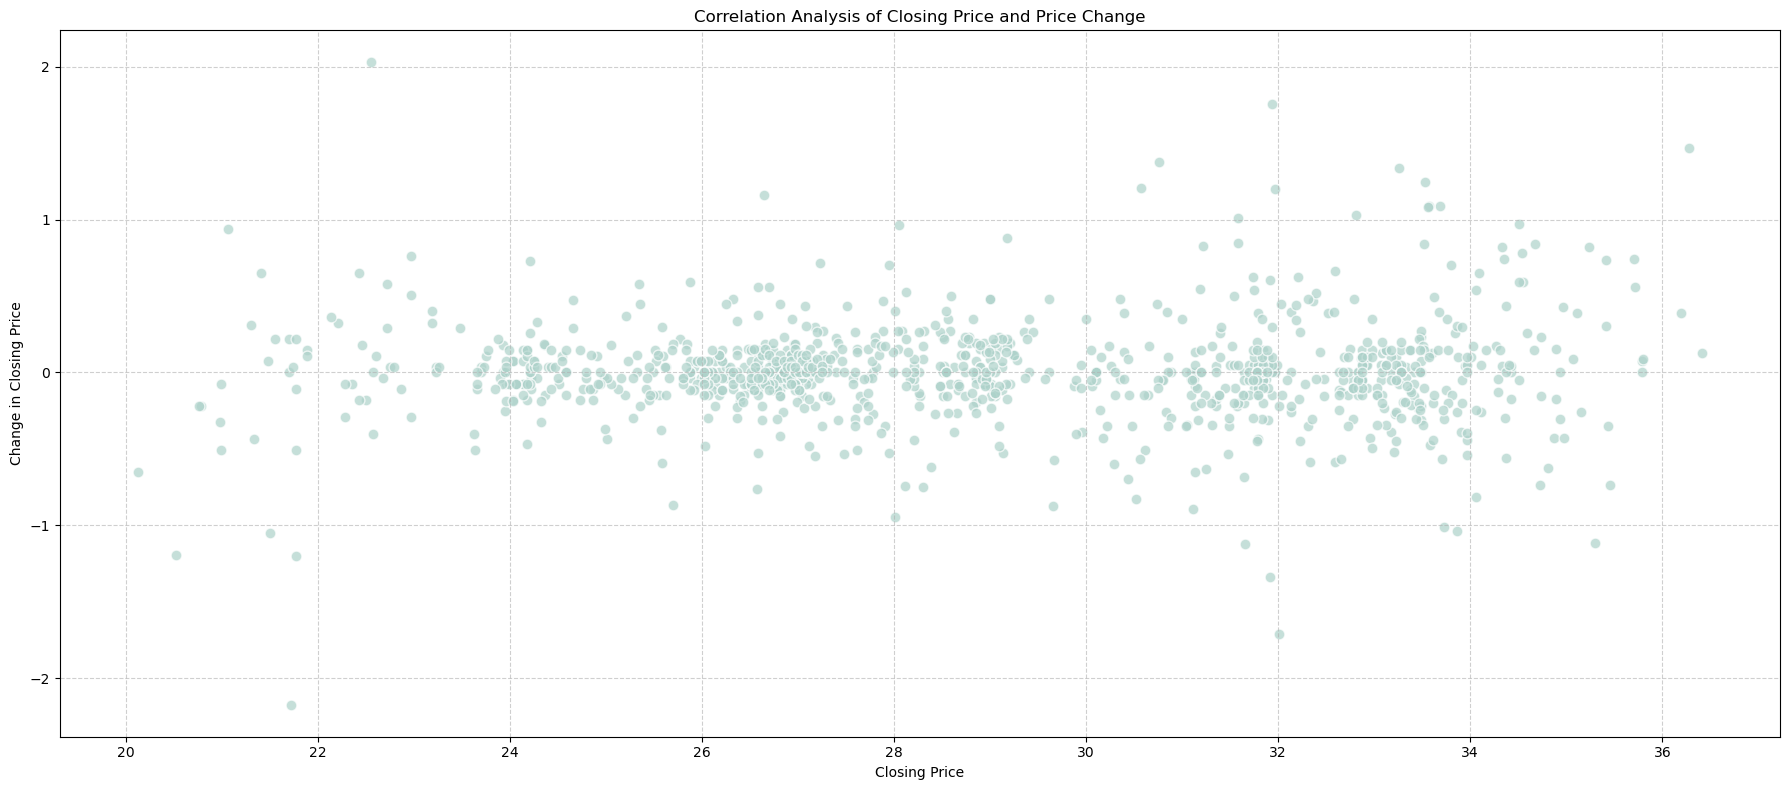

In [63]:
# Plot correlation between closing price and change in closing price
plt.figure(figsize=(18, 8))
plt.scatter(df['Close'], df['Change_Close'], color='#ADD2CA', alpha=0.7, edgecolors='w', s=60)
plt.title('Correlation Analysis of Closing Price and Price Change')
plt.xlabel('Closing Price')
plt.ylabel('Change in Closing Price')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<Figure size 1800x800 with 0 Axes>

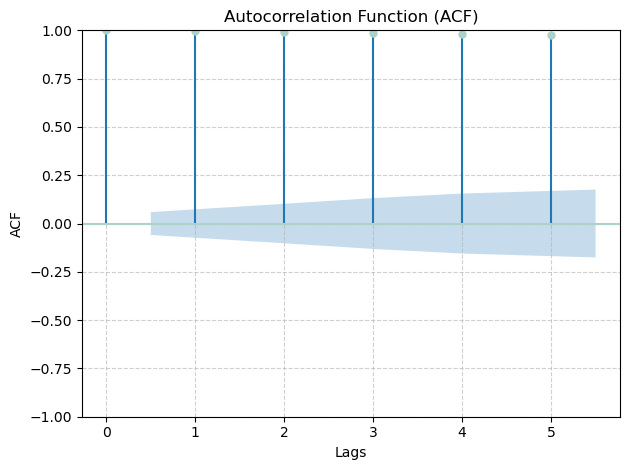

<Figure size 1800x800 with 0 Axes>

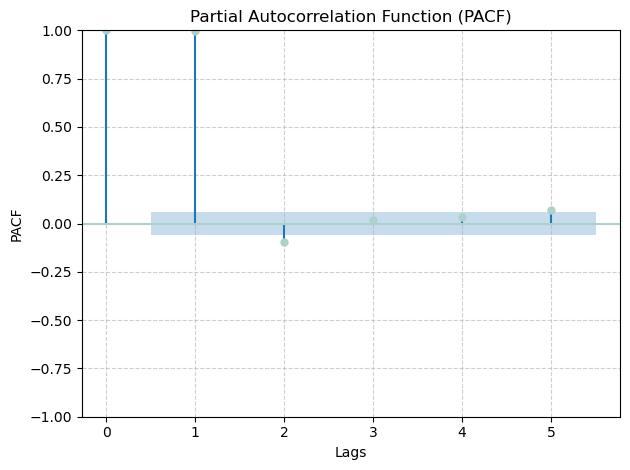

In [65]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot Autocorrelation Function (ACF)
plt.figure(figsize=(18, 8))
plot_acf(df['Close'], lags=5, color='#ADD2CA')
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot Partial Autocorrelation Function (PACF)
plt.figure(figsize=(18, 8))
plot_pacf(df['Close'], lags=5, color='#ADD2CA')
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

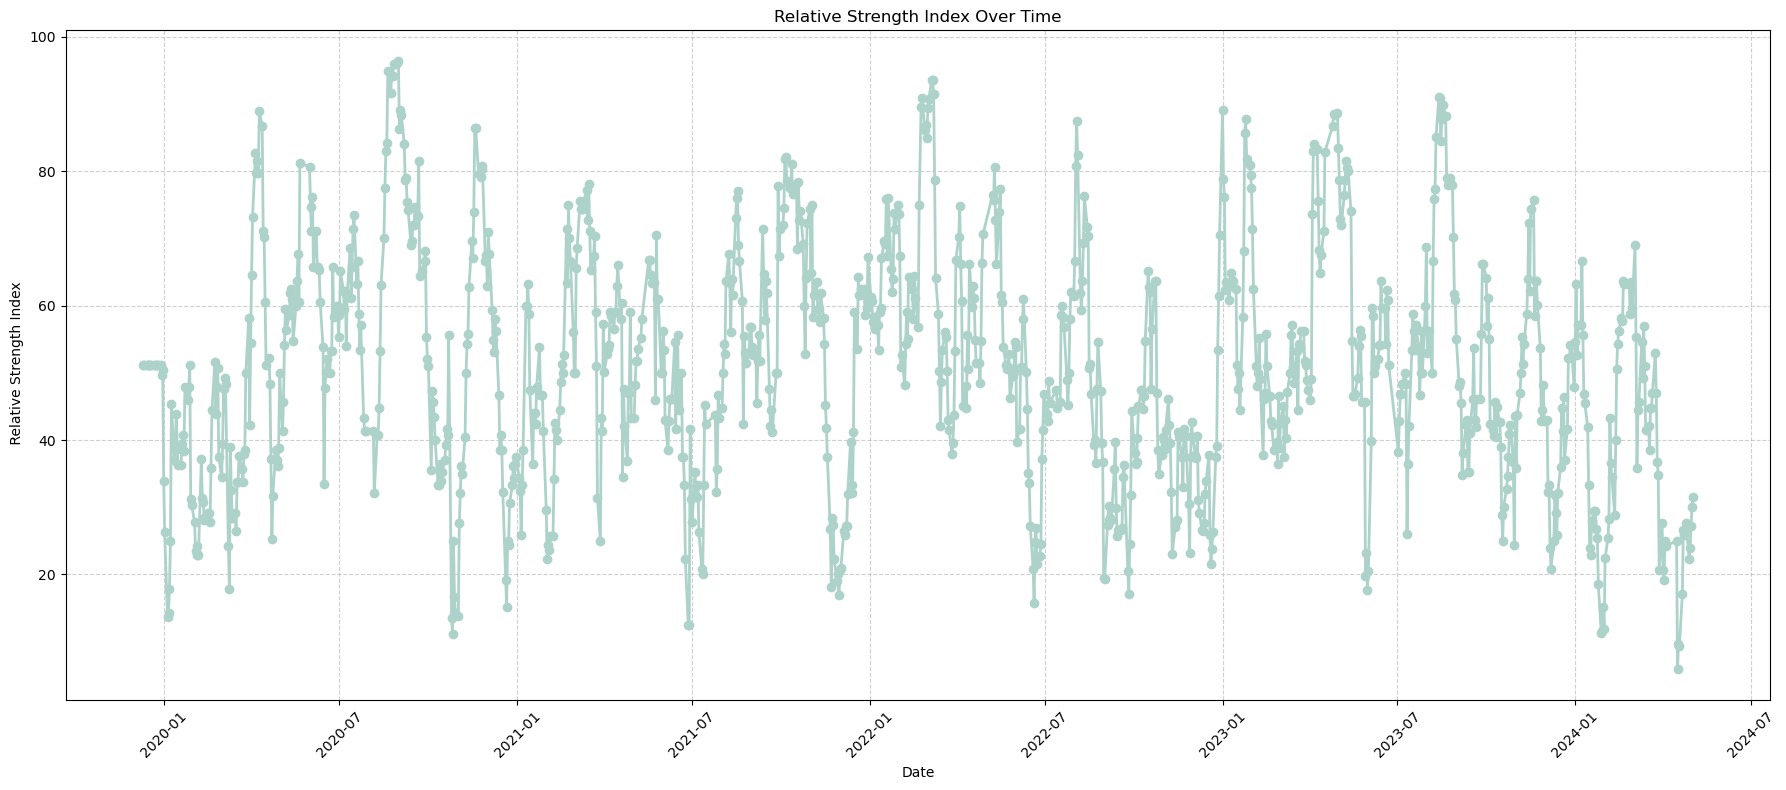

In [68]:
# Plot Relative Strength Index (RSI) over time
plt.figure(figsize=(18, 8))

plt.plot(df['Date'], df['RSI'], color='#ADD2CA', marker='o', linestyle='-', linewidth=2)
plt.title('Relative Strength Index Over Time')
plt.xlabel('Date')
plt.ylabel(' Relative Strength Index')

plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


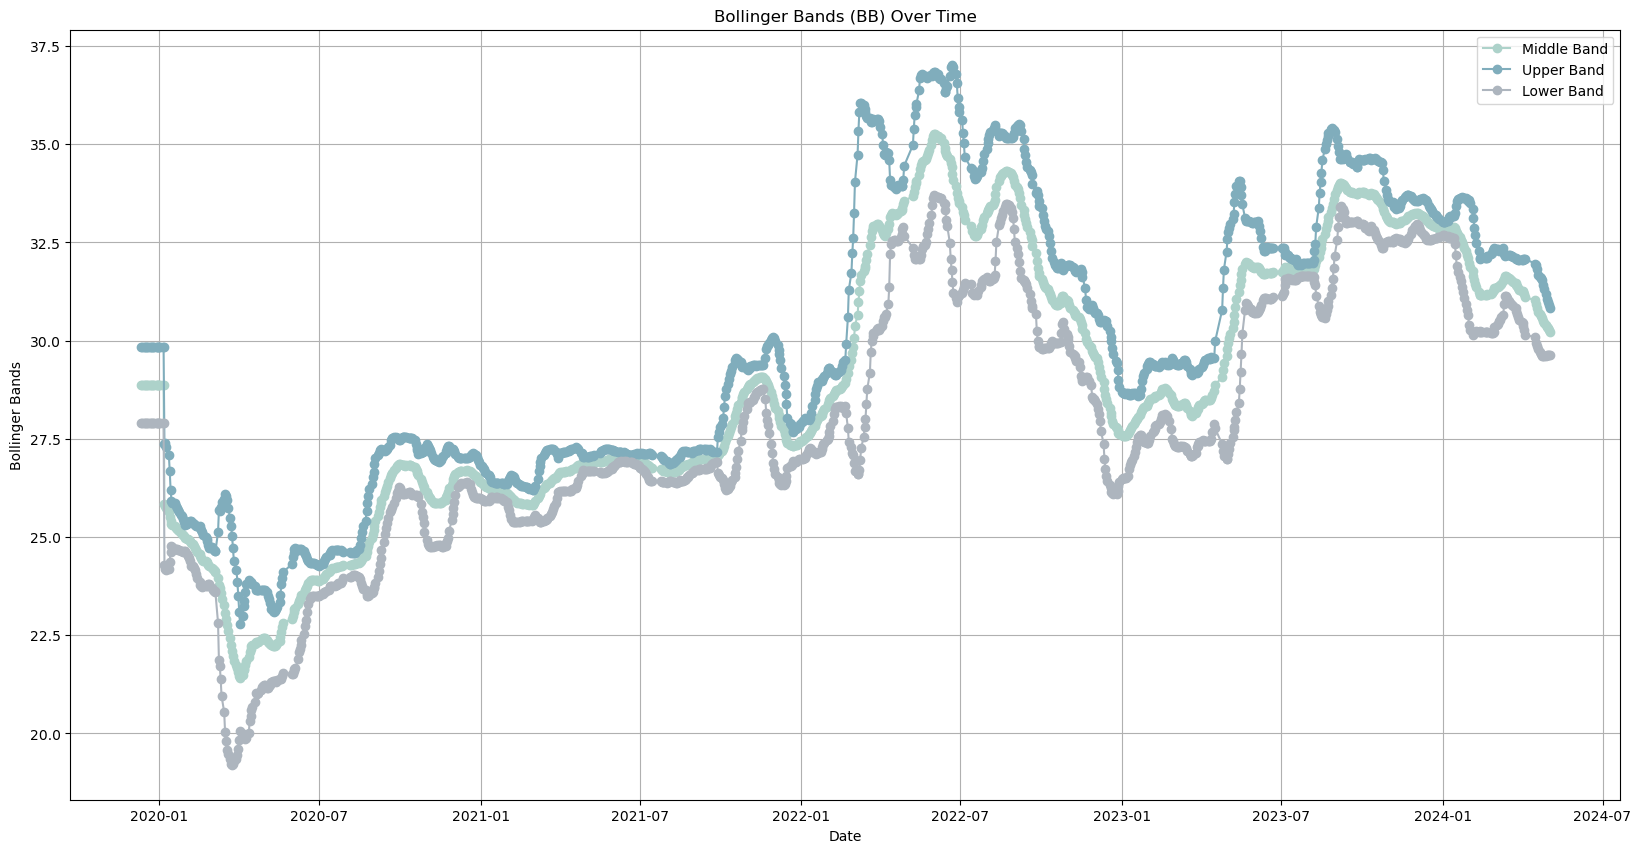

In [72]:
plt.figure(figsize=(20, 10))
plt.plot(df['Date'], df['BB_Middle_Band'], marker='o', color='#ADD2CA', label='Middle Band')
plt.plot(df['Date'], df['BB_Upper_Band'], marker='o', color='#80ADBC', label='Upper Band')
plt.plot(df['Date'], df['BB_Lower_Band'], marker='o', color='#ADB5BE', label='Lower Band')
plt.title('Bollinger Bands (BB) Over Time')
plt.xlabel('Date')
plt.ylabel('Bollinger Bands')
plt.legend()
plt.grid(True)
plt.show()

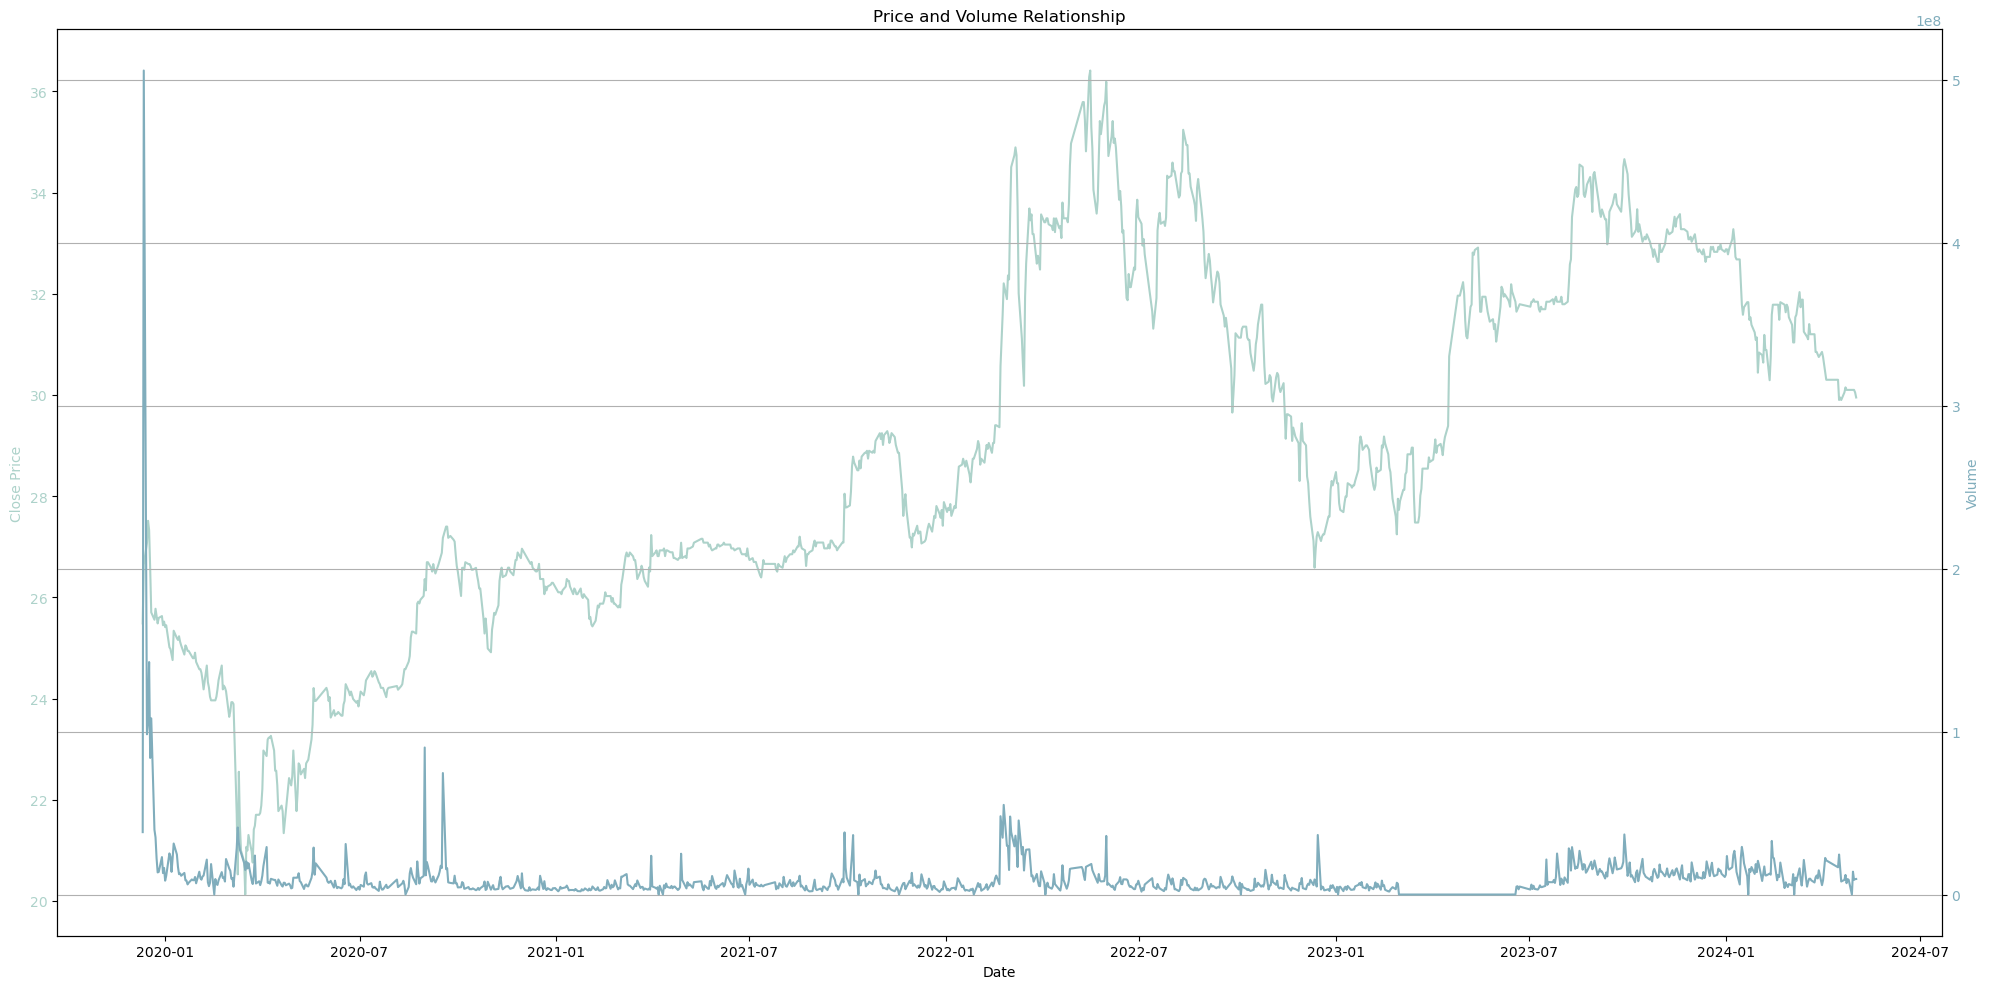

In [74]:
fig, ax1 = plt.subplots(figsize=(20, 10))

color = '#ADD2CA'
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color=color)
ax1.plot(df['Date'], df['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = '#80ADBC'
ax2.set_ylabel('Volume', color=color)  
ax2.plot(df['Date'], df['Volume'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Price and Volume Relationship')
fig.tight_layout()  
plt.grid(True)
plt.show()

/var/folders/b0/c_1tf2q95535mgc727tcfg1h0000gn/T/ipykernel_5804/2826645977.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


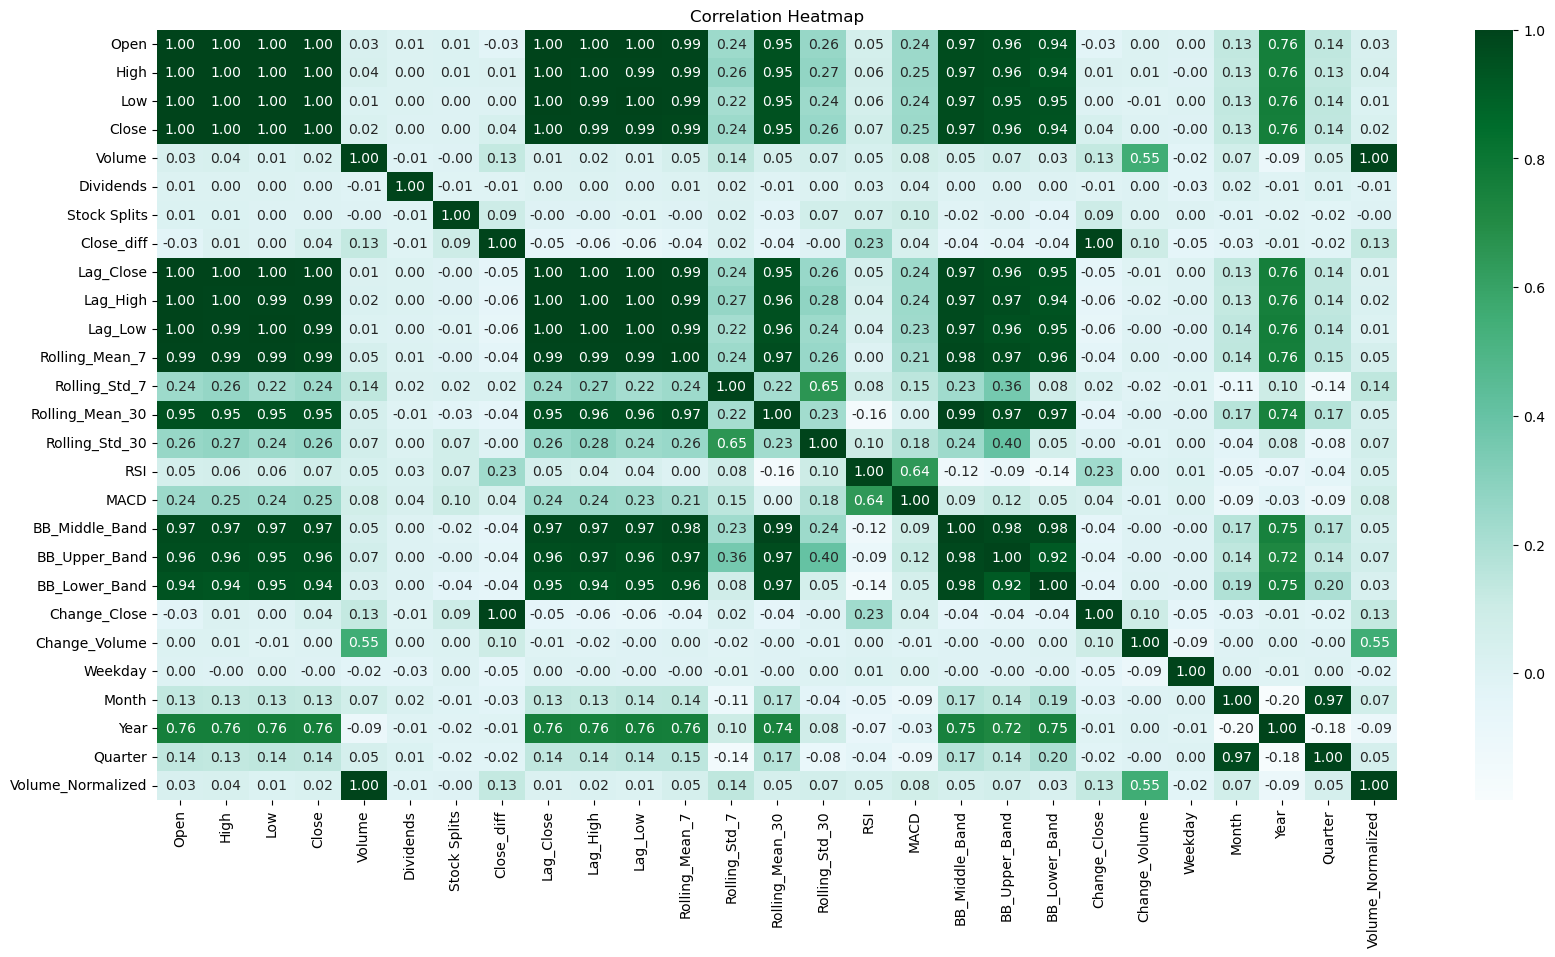

In [80]:
# Correlation Heatmap
plt.figure(figsize=(20, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='BuGn', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose time series
decomposition = seasonal_decompose(df['Close'], model='additive', period=30 )
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.suptitle('Seasonal Decomposition of Close Prices')
plt.show()


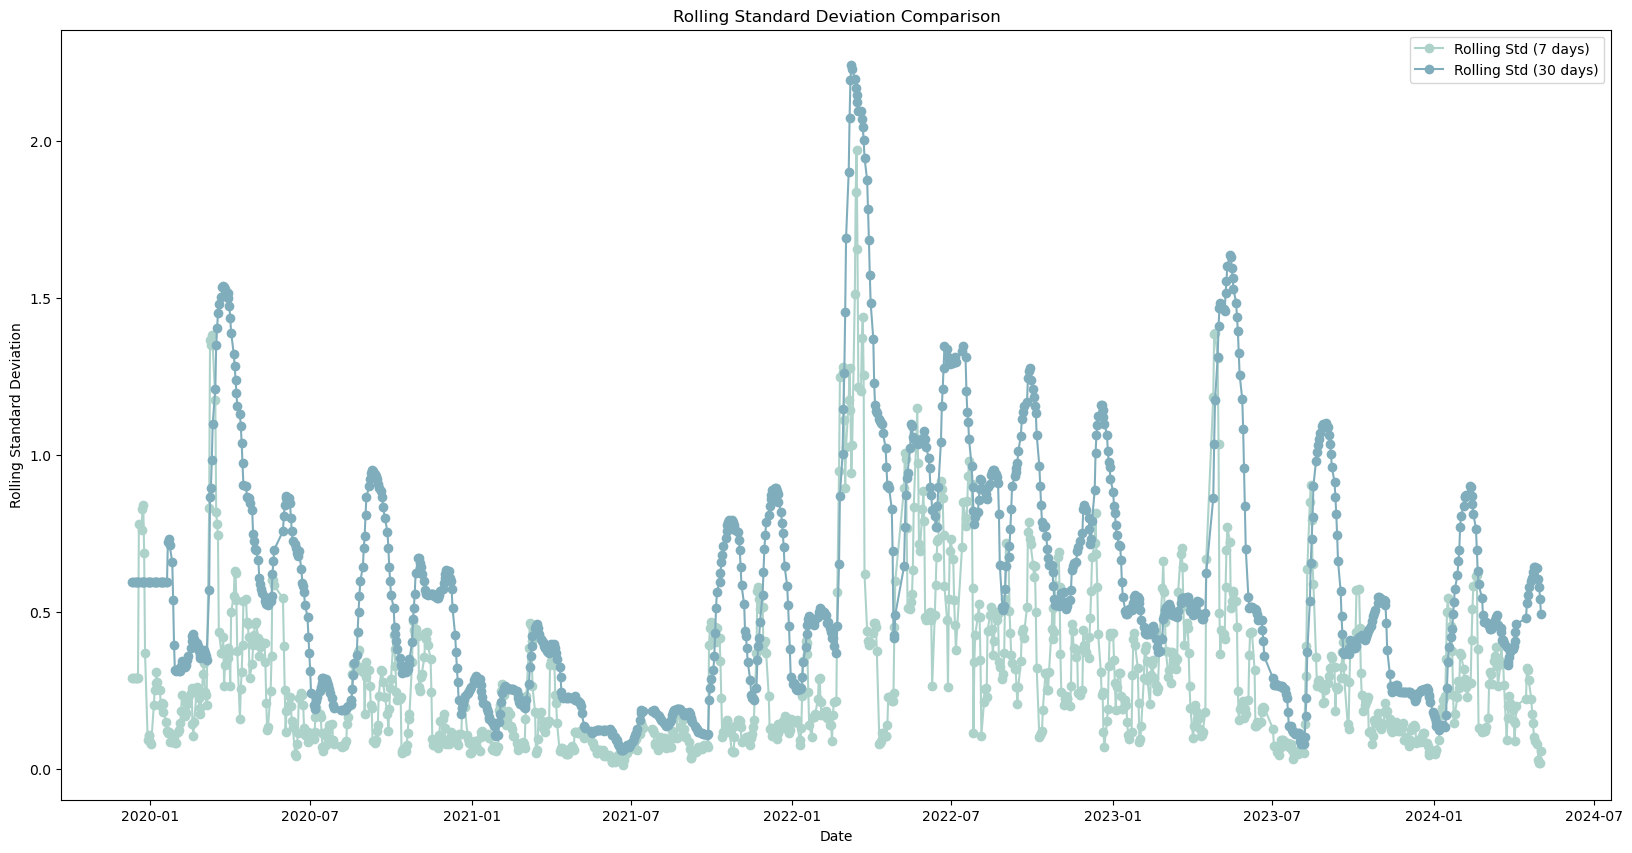

In [91]:
# Compare rolling standard deviation
plt.figure(figsize=(20, 10))
plt.plot(df['Date'], df['Rolling_Std_7'], marker='o', color='#ADD2CA', label='Rolling Std (7 days)')
plt.plot(df['Date'], df['Rolling_Std_30'], marker='o', color='#80ADBC', label='Rolling Std (30 days)')
plt.title('Rolling Standard Deviation Comparison')
plt.xlabel('Date')
plt.ylabel('Rolling Standard Deviation')
plt.legend()
plt.show()


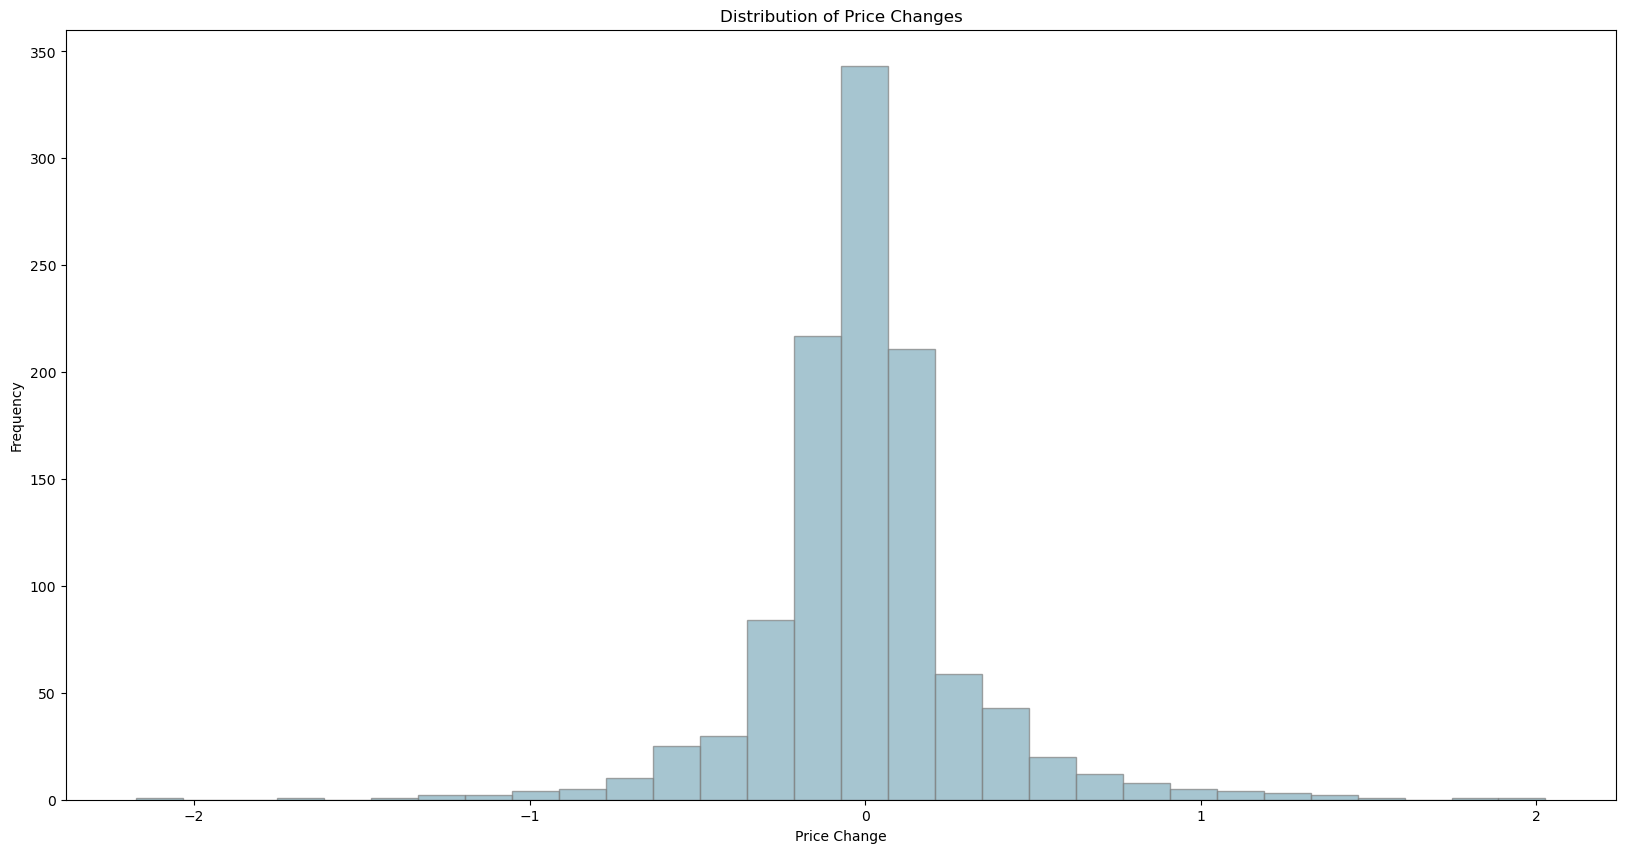

In [94]:
plt.figure(figsize=(20, 10))
plt.hist(df['Change_Close'].dropna(), bins=30, color='#80ADBC', edgecolor='gray', alpha=0.7)
plt.title('Distribution of Price Changes')
plt.xlabel('Price Change')
plt.ylabel('Frequency')
plt.show()

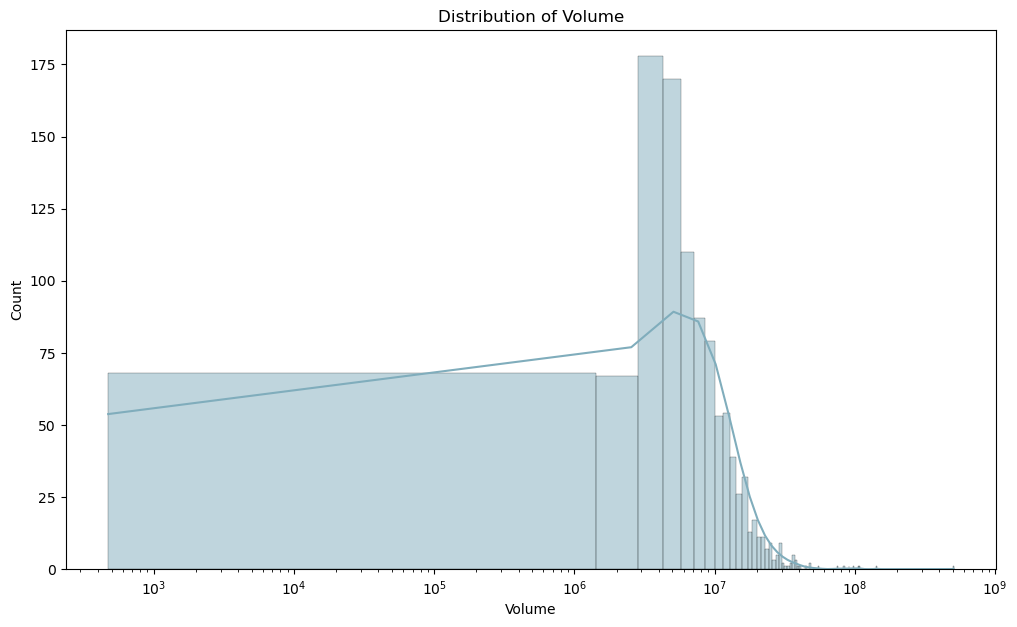

In [119]:
plt.figure(figsize=(12, 7))
sns.histplot(df[df['Volume'] > 0]['Volume'], kde=True, color='#80ADBC')
plt.title('Distribution of Volume')
plt.xscale('log')  # Applying log scale for better visibility of distribution
plt.show()


###  Time Series Analysis

In [104]:
df.set_index('Date', inplace=True)

close_prices = df['Close']

In [107]:
from statsmodels.tsa.stattools import adfuller

In [109]:
def adf_test(timeseries):
    result = adfuller(timeseries.dropna(), autolag='AIC')
    print(f'ADF Statistic: {result[0]:.6f}')
    print(f'p-value: {result[1]:.6f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.3f}')

# Apply ADF Test
print("ADF Test Results:")
adf_test(df['Close'])

ADF Test Results:
ADF Statistic: -1.495064
p-value: 0.535952
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


In [111]:
from statsmodels.tsa.stattools import kpss

In [112]:
def kpss_test(timeseries):
    # Drop NaN values and apply KPSS test
    result = kpss(timeseries.dropna(), regression='c', nlags='auto')
    
    # Extract results
    kpss_statistic, p_value, _, critical_values = result
    
    # Print results
    print(f'KPSS Statistic: {kpss_statistic:.6f}')
    print(f'p-value: {p_value:.6f}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'\t{key}: {value:.3f}')

# Apply KPSS Test
print("\nKPSS Test Results:")
kpss_test(df['Close'])


KPSS Test Results:
KPSS Statistic: 3.702904
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/var/folders/b0/c_1tf2q95535mgc727tcfg1h0000gn/T/ipykernel_5804/1706911733.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(timeseries.dropna(), regression='c', nlags='auto')


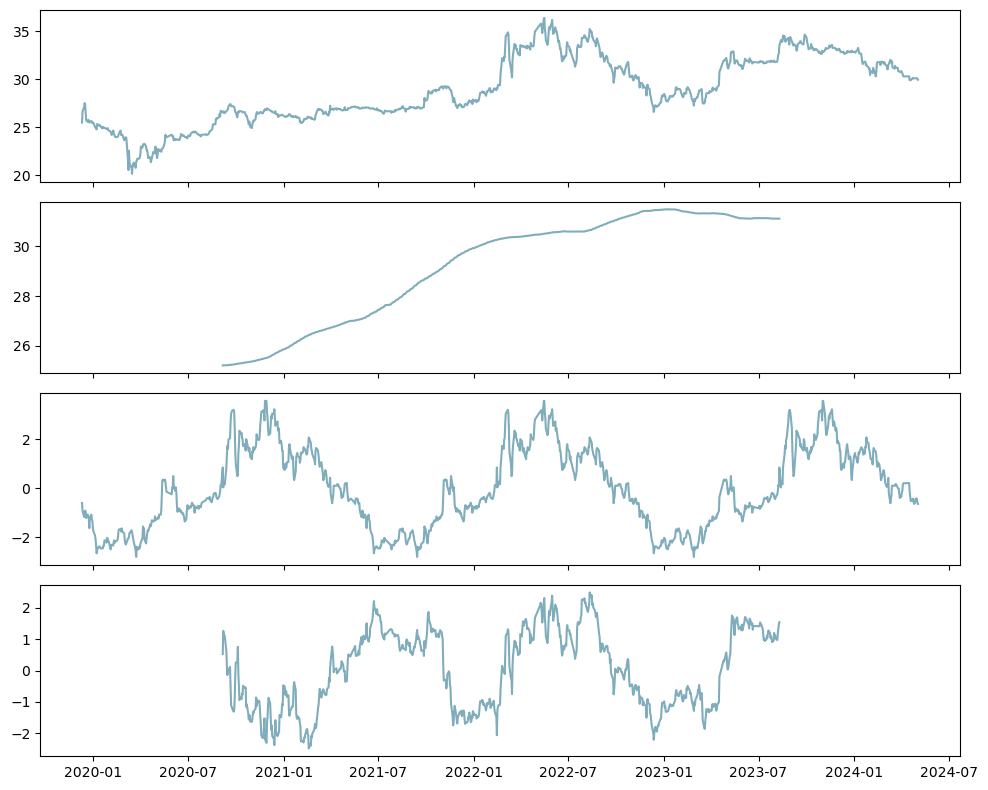

In [116]:
def decompose_and_plot(series, model='additive', period=365, color='#80ADBC'):
    decomposition = seasonal_decompose(series, model=model, period=period)
    fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

    for i, component in enumerate([series, decomposition.trend, decomposition.seasonal, decomposition.resid]):
        axes[i].plot(component, color=color)

    plt.tight_layout()
    plt.show()

decompose_and_plot(df['Close'])

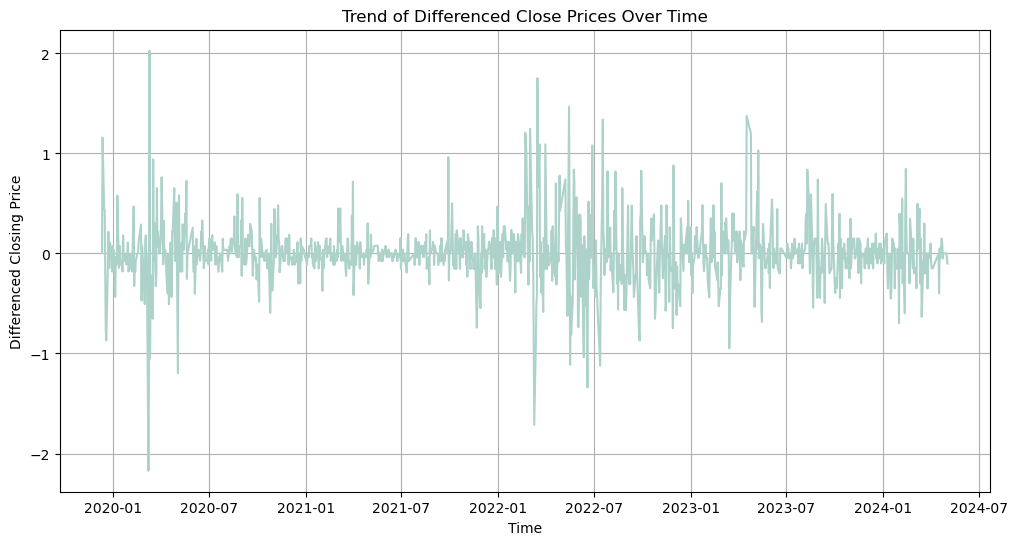

In [122]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close_diff'], linestyle='-', marker='', color='#ADD2CA')
plt.title('Trend of Differenced Close Prices Over Time')
plt.xlabel('Time')
plt.ylabel('Differenced Closing Price')
plt.grid(True)
plt.show()

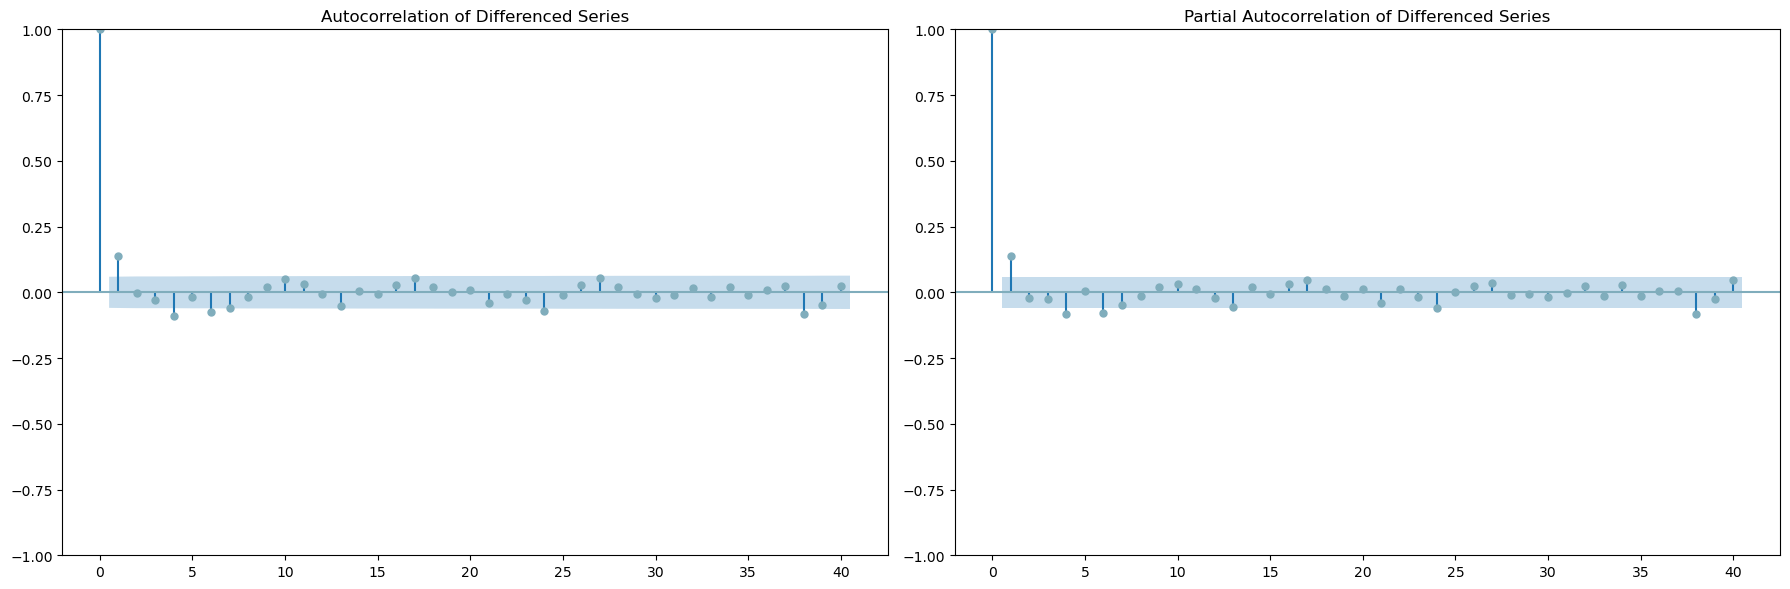

In [127]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
plot_acf(df['Close_diff'].dropna(), ax=axes[0], lags=40, color='#80ADBC')
axes[0].set_title('Autocorrelation of Differenced Series')
plot_pacf(df['Close_diff'].dropna(), ax=axes[1], lags=40, method='ywm', color='#80ADBC')
axes[1].set_title('Partial Autocorrelation of Differenced Series')
plt.tight_layout()
plt.show()

### Feature engineering

In [129]:
df['Change'] = df['Close'].diff()

# Calculate gains and losses
df['Gain'] = np.where(df['Change'] > 0, df['Change'], 0)
df['Loss'] = np.where(df['Change'] < 0, -df['Change'], 0)

# Calculate average gains and losses over a 14-day window
df['Avg_Gain'] = df['Gain'].rolling(window=14).mean()
df['Avg_Loss'] = df['Loss'].rolling(window=14).mean()

# Compute Relative Strength (RS) and Relative Strength Index (RSI)
df['RS'] = df['Avg_Gain'] / df['Avg_Loss']
df['RSI'] = 100 - (100 / (1 + df['RS']))

df.dropna(inplace=True)

In [131]:
from sklearn.preprocessing import StandardScaler

In [132]:
# Initialize the scaler
scaler = StandardScaler()

# Select and scale relevant features
features = df[['Close', 'RSI', 'Volume']]
scaled_features = scaler.fit_transform(features)

# Define a function to generate sequences from the scaled data
def generate_sequences(data, seq_length=60):
    sequences = []
    targets = []
    for start in range(len(data) - seq_length):
        end = start + seq_length
        sequences.append(data[start:end])
        targets.append(data[end, 0])
    return np.array(sequences), np.array(targets)

# Create sequences and targets
X, y = generate_sequences(scaled_features)

In [133]:
train_size = int(len(X) * 0.8)

# Split the sequences into training and testing sets
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [138]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


### LSTM Model

In [139]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers.legacy import Adam

In [140]:
# Define the LSTM model
model = Sequential([
    # First LSTM layer with 100 units, returning sequences for the next LSTM layer
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(0.2),
        LSTM(100),
        Dropout(0.2),
        Dense(1)
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Adam optimizer with a learning rate of 0.001
    loss='mean_squared_error'  # Loss function for regression
)

### Model Training

In [141]:
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


Epoch 1/50
23/23 [==============================] - 2s 54ms/step - loss: 0.1660 - val_loss: 0.0441
Epoch 2/50
23/23 [==============================] - 1s 41ms/step - loss: 0.0398 - val_loss: 0.0500
Epoch 3/50
23/23 [==============================] - 1s 41ms/step - loss: 0.0370 - val_loss: 0.0917
Epoch 4/50
23/23 [==============================] - 1s 41ms/step - loss: 0.0324 - val_loss: 0.0513
Epoch 5/50
23/23 [==============================] - 1s 43ms/step - loss: 0.0315 - val_loss: 0.0549
Epoch 6/50
23/23 [==============================] - 1s 42ms/step - loss: 0.0285 - val_loss: 0.0804
Epoch 7/50
23/23 [==============================] - 1s 43ms/step - loss: 0.0330 - val_loss: 0.0749
Epoch 8/50
23/23 [==============================] - 1s 43ms/step - loss: 0.0293 - val_loss: 0.0550
Epoch 9/50
23/23 [==============================] - 1s 42ms/step - loss: 0.0266 - val_loss: 0.0456
Epoch 10/50
23/23 [==============================] - 1s 41ms/step - loss: 0.0274 - val_loss: 0.0456
Epoch 11/

### Model Evaluation

In [146]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print('Test MSE: {:.4f}'.format(mse))
print('Test MAE: {:.4f}'.format(mae))

7/7 [==============================] - 0s 12ms/step
Test MSE: 0.0245
Test MAE: 0.1158


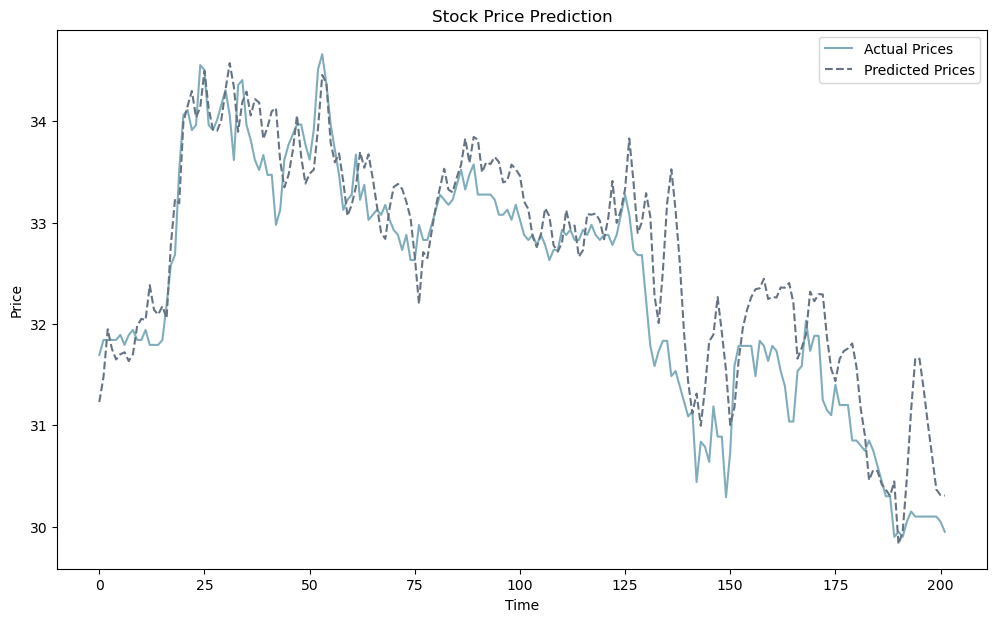

In [150]:
predictions_reshaped = np.reshape(predictions, (-1, 1))
y_test_reshaped = np.reshape(y_test, (-1, 1))

# Prepare data for inverse scaling
scaled_predictions = scaler.inverse_transform(np.hstack((predictions_reshaped, np.zeros_like(predictions_reshaped), np.zeros_like(predictions_reshaped))))
scaled_actuals = scaler.inverse_transform(np.hstack((y_test_reshaped, np.zeros_like(y_test_reshaped), np.zeros_like(y_test_reshaped))))

# Plot results
plt.figure(figsize=(12, 7))
plt.plot(scaled_actuals[:, 0], label='Actual Prices', color='#80ADBC')
plt.plot(scaled_predictions[:, 0], label='Predicted Prices', color='#657383', linestyle='--')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()